# OPG GFP Processing and Analysis

Contents:
* Housekeeping / Importing Packages
* Loading in the data
* Data Cleaning
* Population stats for Study I and Study II
* Study I analysis
* Study II analysis
* Further analyses



## Housekeeping

In [1]:
%config InlineBackend.figure_format = 'retina' 

In [2]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
#import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

In [3]:
pd.set_option('display.max_columns', None)

## Loading In The Data

In [4]:
BFASI = pd.read_csv("./Study I/BFAS/General_Factor_Extraction_and_Correlations/STUDY_1_BFASOPG_RAW.csv")
BFASII = pd.read_csv("./Study II/BFAS/General_Factor_Extraction_and_Correlations/BFAS_SII_RAW_ANSWERS.csv")



In [5]:
BFFI = pd.read_csv("./Study I/BFF/General_Factor_Extraction_and_Correlations/BFF_STUDYI_RAW_ANSWERS.csv")
BFFII = pd.read_csv("./Study II/BFF/General_Factor_Extraction_and_Correlations/BFF_SII_RAW_DATA.csv")

In [6]:
#Cleaning -- Remove the test / "debug cases"; deduplicate, etc.

In [7]:
print(sum(BFASI['assignmentid'].astype(str).str.contains('debug')))
print(sum(BFASII['assignmentid'].astype(str).str.contains('debug')))
print(sum(BFFI['assignmentid'].astype(str).str.contains('debug')))
print(sum(BFFII['assignmentid'].astype(str).str.contains('debug')))


3
0
0
0


In [8]:
BFASI = BFASI[~BFASI['assignmentid'].astype(str).str.contains('debug')]

In [9]:
#Cleaning. Double check that there aren't duplicate people in the same branch
print(sum(BFASI['workerid'].duplicated()))
print(sum(BFASI.duplicated()))

print(sum(BFASII['workerid'].duplicated()))
print(sum(BFASII.duplicated()))

print(sum(BFFI['workerid'].duplicated()))
print(sum(BFFI.duplicated()))

print(sum(BFFII['workerid'].duplicated()))
print(sum(BFFII.duplicated()))

0
0
0
0
0
0
0
0


In [10]:
#Cleaning. Dedupe the people who somehow participated in multiple arms of the survey.

In [11]:
print(len(set(BFASI['workerid']).intersection(set(BFASII['workerid']))))
print(len(set(BFASI['workerid']).intersection(set(BFFI['workerid']))))
print(len(set(BFASI['workerid']).intersection(set(BFFII['workerid']))))
print("\n")
print(len(set(BFFI['workerid']).intersection(set(BFFII['workerid']))))
print(len(set(BFFI['workerid']).intersection(set(BFASII['workerid']))))
print("\n")
print(len(set(BFASII['workerid']).intersection(set(BFFII['workerid']))))

45
56
33


24
44


21


In [12]:
#DEDUPLICATION:

#This code seperates out BFASI from the others
BFASII = BFASII[~BFASII['workerid'].isin(BFASI['workerid'])]
BFFI = BFFI[~BFFI['workerid'].isin(BFASI['workerid'])]
BFFII = BFFII[~BFFII['workerid'].isin(BFASI['workerid'])]

In [13]:
BFASII = BFASII[~BFASII['workerid'].isin(BFFI['workerid'])]

In [14]:
BFFI = BFFI[~BFFI['workerid'].isin(BFFII['workerid'])]

In [15]:
BFASII = BFASII[~BFASII['workerid'].isin(BFFII['workerid'])]

In [16]:
print(len(set(BFASI['workerid']).intersection(set(BFASII['workerid']))))
print(len(set(BFASI['workerid']).intersection(set(BFFI['workerid']))))
print(len(set(BFASI['workerid']).intersection(set(BFFII['workerid']))))
print("\n")
print(len(set(BFFI['workerid']).intersection(set(BFFII['workerid']))))
print(len(set(BFFI['workerid']).intersection(set(BFASII['workerid']))))
print("\n")
print(len(set(BFASII['workerid']).intersection(set(BFFII['workerid']))))

0
0
0


0
0


0


 -- -- -- -- 

### Extracting the deduped data

In [17]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
        return pd.Series(row)

In [18]:
BFFI = BFFI.apply(takestring,axis=1)

In [19]:
BFFII = BFFII.apply(takestring,axis=1)

In [20]:
BFASI = BFASI.apply(takestring,axis=1)

Unnamed: 0                                                   16
uniqueid          A195MOXRMNHRVT:3KRVW3HTZNMTNNPPYAWH1YTFZURSMN
assignmentid                     3KRVW3HTZNMTNNPPYAWH1YTFZURSMN
workerid                                         A195MOXRMNHRVT
hitid                            3AA88CN98P4T7131M26OFNUTG1DYKP
ipaddress                                        127.13.130.129
browser                                                  chrome
platform                                                windows
language                                                UNKNOWN
cond                                                          0
counterbalance                                                0
codeversion                                                   1
beginhit                                    2014-10-23 19:02:50
beginexp                                                    NaN
endhit                                                      NaN
bonus                                   

Unnamed: 0                                                  265
uniqueid          A3T3K88IYZ9H8K:3N4BPTXIO8TECCHQ23E11MJZVMJKUS
assignmentid                     3N4BPTXIO8TECCHQ23E11MJZVMJKUS
workerid                                         A3T3K88IYZ9H8K
hitid                            3AA88CN98P4T7131M26OFNUTG1DYKP
ipaddress                                        127.13.130.129
browser                                                 firefox
platform                                                windows
language                                                UNKNOWN
cond                                                          0
counterbalance                                                0
codeversion                                                   1
beginhit                                    2014-10-23 19:44:26
beginexp                                                    NaN
endhit                                                      NaN
bonus                                   

In [21]:
BFASII = BFASII.apply(takestring,axis=1)

In [22]:
#Next, drop the rows with missing datastrings.

In [23]:
BFASI = BFASI[~pd.isnull(BFASI['datastring'])]
BFASII = BFASII[~pd.isnull(BFASII['datastring'])]

In [24]:
BFFI = BFFI[~pd.isnull(BFFI['datastring'])]
BFFII = BFFII[~pd.isnull(BFFII['datastring'])]

In [25]:
#what about null entries for the data itself??

In [26]:
BFASI = BFASI[~BFASI.iloc[:,0:-18].isnull().any(axis=1)]

In [27]:
BFASII = BFASII[~BFASII.iloc[:,0:-18].isnull().any(axis=1)]

In [28]:
BFFI = BFFI[~BFFI.iloc[:,0:-18].isnull().any(axis=1)]

In [29]:
BFFII = BFFII[~BFFII.iloc[:,0:-18].isnull().any(axis=1)]

In [30]:
print(len(BFASI['workerid'].unique()) == len(BFASI))
print(len(BFASII['workerid'].unique()) == len(BFASII))
print(len(BFFI['workerid'].unique()) == len(BFFI))
print(len(BFFII['workerid'].unique()) == len(BFFII))

True
True
True
True


In [31]:
print("AUDIENCE DETAILS")
print("\n")
print("BFAS STUDY I: " + str(len(BFASI)))
print("BFAS STUDY II: " + str(len(BFASII)))
print("BFF STUDY I: " + str(len(BFFI)))
print("BFF STUDY II: " + str(len(BFFII)))
print("\n")
print("STUDY I TOTAL: "+str(len(BFASI)+len(BFFI)))
print("STUDY II TOTAL: "+str(len(BFASII)+len(BFFII)))

AUDIENCE DETAILS


BFAS STUDY I: 342
BFAS STUDY II: 331
BFF STUDY I: 360
BFF STUDY II: 419


STUDY I TOTAL: 702
STUDY II TOTAL: 750


In [32]:
#save to csvs
BFASI.to_csv("BFAS_STUDYI_2021.csv")
BFASII.to_csv("BFAS_STUDYII_2021.csv")
BFFI.to_csv("BFF_STUDYI_2021.csv")
BFFII.to_csv("BFF_STUDYII_2021.csv")

In [33]:
BFASI = pd.read_csv("BFAS_STUDYI_2021.csv")
BFASII = pd.read_csv("BFAS_STUDYII_2021.csv")
BFFI = pd.read_csv("BFF_STUDYI_2021.csv")
BFFII = pd.read_csv("BFF_STUDYII_2021.csv")

BFASI = BFASI.drop('Unnamed: 0',axis=1)
BFASII = BFASII.drop('Unnamed: 0',axis=1)
BFFI = BFFI.drop('Unnamed: 0',axis=1)
BFFII = BFFII.drop('Unnamed: 0',axis=1)

In [34]:
#def ExtractGender(row):
#    #print json.loads(row['datastring'])
#    try:
#        d = json.loads(row['datastring'])
#    except:
#        pass
#    else:
#        return d['questiondata']['engagement']

#def ExtractAge(row):
#    #print json.loads(row['datastring'])
#    try:
#        d = json.loads(row['datastring'])
#    except:
#        print( row)
#    else:
#        return d['questiondata']['age']

In [35]:
def ExtractGender2(x):
    q = json.loads(x)['questiondata']
    try:
        return q['engagement']
    except:
        if q=={}:
            return 'BLANK'
        
def ExtractAge2(x):
    q = json.loads(x)['questiondata']
    try:
        return q['age']
    except:
        if q=={}:
            return 'BLANK'

In [122]:
gender_BFASI = BFASI['datastring'].apply(ExtractGender2)
assert gender_BFASI.value_counts()['Male'] == 195
gender_BFASI.value_counts()
#195 Male, 141 Female BLANK 6


Male      195
Female    141
BLANK       6
Name: datastring, dtype: int64

In [37]:
gender_BFASII = BFASII['datastring'].apply(ExtractGender2)
gender_BFASII.value_counts()

Female    170
Male      159
Other       2
Name: datastring, dtype: int64

In [38]:
gender_BFFI = BFFI['datastring'].apply(ExtractGender2)
gender_BFFI.value_counts()

Male      184
Female    175
Other       1
Name: datastring, dtype: int64

In [39]:
gender_BFFII = BFFII['datastring'].apply(ExtractGender2)
gender_BFFII.value_counts()


Male      229
Female    190
Name: datastring, dtype: int64

In [40]:
print("STUDY I GENDER DETAILS: ")
print(gender_BFASI.append(gender_BFFI).value_counts())

STUDY I GENDER DETAILS: 
Male      379
Female    316
BLANK       6
Other       1
Name: datastring, dtype: int64


In [41]:
print("STUDY II GENDER DETAILS: ")
print(gender_BFASII.append(gender_BFFII).value_counts())

STUDY II GENDER DETAILS: 
Male      388
Female    360
Other       2
Name: datastring, dtype: int64


In [42]:
# AGE

In [43]:
age_BFASI = BFASI['datastring'].apply(ExtractAge2)
age_sI = pd.Series(age_BFASI)
BFASI_AGES = age_sI[age_sI!='BLANK'].astype(float)

In [44]:
age_BFASII = BFASII['datastring'].apply(ExtractAge2)
age_sII = pd.Series(age_BFASII)
BFASII_AGES = age_sII[age_sII!='BLANK'].astype(float)

In [45]:
age_BFFI = BFFI['datastring'].apply(ExtractAge2)
age_sI_bff = pd.Series(age_BFFI)
BFFI_AGES = age_sI_bff[age_sI_bff !='BLANK'].astype(float)

In [46]:
age_BFFII = BFFII['datastring'].apply(ExtractAge2)
age_sII_bff = pd.Series(age_BFFII)
BFFII_AGES = age_sII_bff[age_sII_bff !='BLANK'].astype(float)

In [47]:
print("BFAS I AGES")
print(BFASI_AGES.mean())
print(BFASI_AGES.std())
print(BFASI_AGES.min())
print(BFASI_AGES.max())

BFAS I AGES
33.788690476190474
11.219651872084745
18.0
68.0


In [48]:
print("STUDY I: AGES")
print("MEAN AGE: " + str(BFASI_AGES.append(BFFI_AGES).mean()))
print("STD AGE: " + str(BFASI_AGES.append(BFFI_AGES).std()))
print("MIN AGE: " + str(BFASI_AGES.append(BFFI_AGES).min()))
print("MAX AGE: " + str(BFASI_AGES.append(BFFI_AGES).max()))

STUDY I: AGES
MEAN AGE: 33.889367816091955
STD AGE: 11.539265547856205
MIN AGE: 18.0
MAX AGE: 71.0


In [49]:
s2ages = BFASII_AGES.append(BFFII_AGES)
#need to drop the one person who erroneously reported 4 as their age

In [50]:
sum(s2ages==4)

1

In [51]:
s2ages = s2ages[s2ages!=4]

In [52]:
print("STUDY II: AGES")
print("MEAN AGE: " + str(s2ages.mean()))
print("STD AGE: " + str(s2ages.std()))
print("MIN AGE: " + str(s2ages.min()))
print("MAX AGE: " + str(s2ages.max()))

STUDY II: AGES
MEAN AGE: 33.21628838451269
STD AGE: 11.40075528045627
MIN AGE: 18.0
MAX AGE: 74.0


In [53]:
print("BFAS II AGES")

print(BFASII_AGES.mean())
print(BFASII_AGES.std())
print(BFASII_AGES.min())
print(BFASII_AGES.max())

BFAS II AGES
33.99093655589124
11.930476991361962
18.0
74.0


In [54]:
def BFASsplit_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
    r_ls_col = ls_col

    bfas_cols = r_ls_col[:-26]
    opg_cols = r_ls_col[-26:]
    Neuroticism = ['BFAS-1+','BFAS-2+','BFAS-3+',
                   'BFAS-4+','BFAS-5+','BFAS-6+',
                   'BFAS-F7-','BFAS-8-','BFAS-9-',
                   'BFAS-10-','BFAS-11+','BFAS-12+',
                   'BFAS-13+','BFAS-14+','BFAS-15+',
                   'BFAS-16+','BFAS-17-','BFAS-18-',
                   'BFAS-19-','BFAS-20-'] #Column naming is consistent across datasets
    print (bfas_cols[0:10])
    print ('\n')
    print (opg_cols)
    print ('\n')
    BfasDf = df[bfas_cols].copy(deep=True)
    OpgDf = df[opg_cols].copy(deep=True)

    for label in bfas_cols: #ITEM REVERSALS

        if label[-1]=='-': #if item is reversed:
            BfasDf.loc[:,label] = 100 - BfasDf[label].astype(float)

        elif label[-1]=='+': #label = workerID
            BfasDf.loc[:,label] = BfasDf[label].astype(float)
        else:
            BfasDf.loc[:,label] = "HELLO IS THIS AN ERROR"#df['workerid']

    print (OpgDf['OPG_16+'].loc[1])
    print (type(OpgDf['OPG_16+'].loc[1]))


    OpgDf.loc[:,'OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf.loc[:,'IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)

   
    OpgDf.loc[:,'PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.25)+50 #
    OpgDf.loc[:,'PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.25)+50 #
    OpgDf.loc[:,'OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.25)+50 #

    OpgDf.loc[:,'PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf.loc[:,'PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf.loc[:,'OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf.loc[:,'PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf.loc[:,'PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf.loc[:,'OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)
    for label in OpgDf:
        if label[-1]=='-':
            OpgDf.loc[:,label]=100-OpgDf.loc[:,label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf.loc[:,label] = "HELLO THIS IS AN ERROR"

    ##Now, change neuroticism to stability
    for label in Neuroticism:
        BfasDf.loc[:,label] = 100-BfasDf[label].astype(float)


    return BfasDf,OpgDf


In [55]:
#BFASI
BFASI = BFASI.iloc[:,0:-18]
BFASI = BFASI.astype(float)

In [56]:
bfasI,bfasopgI = BFASsplit_and_reverse(BFASI)

['BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-101-', 'BFAS-11+', 'BFAS-12+', 'BFAS-13+', 'BFAS-14+', 'BFAS-15+', 'BFAS-16+']


['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']


59.91
<class 'numpy.float64'>


In [57]:
sum(pd.isnull(bfasI["BFAS-1+"]))

0

In [58]:
#BFASII

In [59]:
BFASII = BFASII.iloc[:,0:-18]
BFASII = BFASII.astype(float)

In [60]:
bfasII,bfasopgII = BFASsplit_and_reverse(BFASII)

['BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-11+', 'BFAS-12+', 'BFAS-13+', 'BFAS-14+', 'BFAS-15+', 'BFAS-16+', 'BFAS-17-']


['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']


50.0
<class 'numpy.float64'>


In [61]:
bfasI.to_csv("2021_BFASI_PersonalityData.csv",index=False)
bfasII.to_csv("2021_BFASII_PersonalityData.csv",index=False)

In [62]:
#BFF -- NO NEED to factor analyze the BFF personality data.
# BUT!! The BFF OPG Data still needs to be TRANSFORMED

In [63]:
def TransformOPGDataStudyI(df):
    OpgDf = df.copy(deep=True)
    OpgDf.loc[:,'OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf.loc[:,'IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)

   
    OpgDf.loc[:,'PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.25)+50
    OpgDf.loc[:,'PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.25)+50
    OpgDf.loc[:,'OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.25)+50

    OpgDf.loc[:,'PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf.loc[:,'PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf.loc[:,'OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf.loc[:,'PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf.loc[:,'PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf.loc[:,'OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)
    for label in OpgDf:
        if label[-1]=='-':
            OpgDf.loc[:,label]=100-OpgDf.loc[:,label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf.loc[:,label] = "HELLO THIS IS AN ERROR"
    return OpgDf

In [64]:
BFFI = BFFI.iloc[:,:-18]

In [65]:
bffI = BFFI.iloc[:,:-26]
bffopgI = BFFI.iloc[:,-26:]

In [66]:
BFFII = BFFII.iloc[:,:-18]

In [67]:
bffII = BFFII.iloc[:,:-28]

In [68]:
bffopgII = BFFII.iloc[:,-28:]

In [69]:
TransformedBFFOPGI = TransformOPGDataStudyI(bffopgI)

In [70]:
TransformedBFFOPGII = TransformOPGDataStudyI(bffopgII) #code works for both s1 and s2

In [71]:
bffopgI['OPG_16+']

0      16.71
1      50.05
2      10.36
3      38.20
4      62.30
       ...  
355    55.01
356    64.66
357    75.59
358    50.00
359    50.00
Name: OPG_16+, Length: 360, dtype: float64

In [72]:
TransformedBFFOPGI['OPG_16+']

0       33.42
1       99.90
2       20.72
3       76.40
4       75.40
        ...  
355     89.98
356     70.68
357     48.82
358    100.00
359    100.00
Name: OPG_16+, Length: 360, dtype: float64

In [73]:
bffopgII['OPG_16+']

0       50.00
1       38.07
2       90.48
3       30.46
4      100.00
        ...  
414      9.86
415     47.16
416     50.00
417     10.34
418     88.03
Name: OPG_16+, Length: 419, dtype: float64

In [74]:
TransformedBFFOPGII['OPG_16+']

0      100.00
1       76.14
2       19.04
3       60.92
4        0.00
        ...  
414     19.72
415     94.32
416    100.00
417     20.68
418     23.94
Name: OPG_16+, Length: 419, dtype: float64

In [77]:
bffI.to_csv("2021_BFFI_PersonalityData.csv",index=False)

In [78]:
bffII.to_csv("2021_BFFII_PersonalityData.csv",index=False)

In [79]:
# Combining OPGS from within Study I;  as well as within Study II

In [80]:
bfasopgI.append(TransformedBFFOPGI).to_csv("2021_OPG_STUDYI.csv",index=False)

In [81]:
assert len(bfasopgI.append(TransformedBFFOPGI)) == 702

In [82]:
bfasopgII.append(TransformedBFFOPGII).to_csv("2021_OPG_STUDYII.csv",index=False)

In [85]:
assert len(bfasopgII.append(TransformedBFFOPGII)) == 750

# GFP-OPG STUDY I

In [ ]:
#### Items to include as the final study I opg scale:
#### FROM the 3Factor Omega cleaning of STUDY I OPG
IE_25.
IE_24.
OPG_13.
OPG_12.
IE_21.
PBR_2.
OPG_10.
OPG_15.
PBR_7.
PBR_5.
IE_20.
PBR_1.
IE_22.
OPG_14.
PBR_6.
PBR_3.
IE_19.
PBR_4.

In [86]:
bfasopgI.columns

Index(['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-',
       'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+',
       'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+',
       'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-'],
      dtype='object')

In [123]:
MeanOPGI_BFAS = bfasopgI[['IE_25-','IE_24+','OPG_13+',
                          'OPG_12+','IE_21+','PBR_2-','OPG_10+',
                          'OPG_15+','PBR_7-','PBR_5+','IE_20+',
                          'PBR_1+','IE_22-','OPG_14+','PBR_6-',
                          'PBR_3+','IE_19+','PBR_4+'
                         ]].mean(axis=1)

(array([ 3.,  8., 24., 44., 72., 54., 59., 55., 19.,  4.]),
 array([36.91722222, 42.85859722, 48.79997222, 54.74134722, 60.68272222,
        66.62409722, 72.56547222, 78.50684722, 84.44822222, 90.38959722,
        96.33097222]),
 <BarContainer object of 10 artists>)

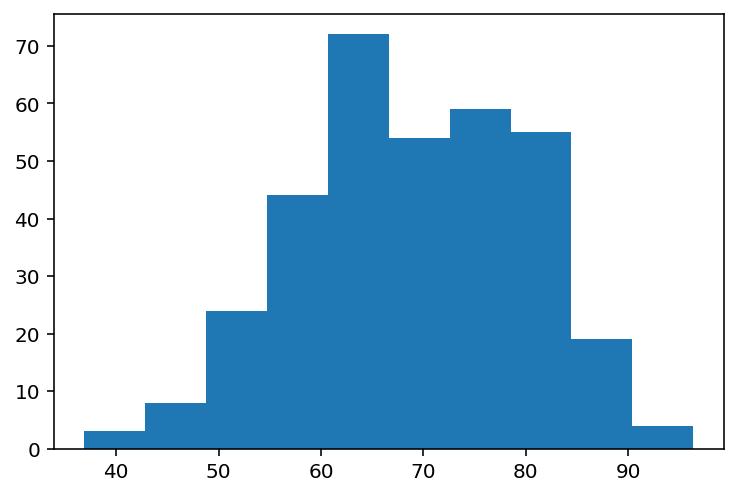

In [89]:
plt.hist(MeanOPGI_BFAS)

In [90]:
bfasI

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-
0,8.85,10.41,86.02,9.97,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,45.04,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,89.25,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,70.55,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,9.47,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,30.68,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,90.03,64.64,90.70,89.37,88.25,89.70,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,9.08,90.37,90.14,65.87,90.26,91.04
1,34.97,39.76,65.14,0.00,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,36.53,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,39.31,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,9.80,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,59.80,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,49.55,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,67.59,0.00,89.76,90.09,49.33,74.28,49.55,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,0.00,100.00,10.13,100.00,89.64,59.35
2,58.80,40.65,67.82,60.24,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,40.87,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,32.63,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,31.40,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,28.40,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,37.81,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,62.58,34.52,67.37,60.58,25.50,59.02,30.96,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,41.20,39.98,60.36,49.78,53.67,67.48
3,50.00,50.00,87.03,62.42,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,36.36,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,50.00,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,50.00,76.22,50.00,30.46,79.57,63.31,50.00,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,37.25,50.00,75.56,50.00,50.11,59.86
4,50.00,50.00,66.43,22.22,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,51.73,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,47.94,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,19.65,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,50.00,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,90.70,50.00,91.70,79.57,90.59,90.92,49.16,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,10.08,90.14,90.59,89.81,50.00,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [91]:
MEANGFP_BFASI = bfasI.mean(axis=1)

In [92]:
MeanOPGI_BFAS

0      86.409583
1      79.620278
2      56.966389
3      67.618333
4      69.298056
         ...    
337    67.137917
338    47.517083
339    61.951250
340    85.664722
341    84.607361
Length: 342, dtype: float64

In [93]:
bfasI[pd.isnull(MEANGFP_BFASI)].index.values == bfasopgI[pd.isnull(MeanOPGI_BFAS)].index.values

array([], dtype=bool)

In [124]:
bfasopgI[pd.isnull(MEANGFP_BFASI)]

,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-


In [95]:
ssp.pearsonr(MEANGFP_BFASI,MeanOPGI_BFAS)

(0.7352624050464519, 2.1832249080235516e-59)

# Correlations by individual factors - BFASI 

In [97]:
correct_order_bfas = [
 'BFAS-1+',
 'BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+',
 'BFAS-22+',
 'BFAS-23+',
 'BFAS-24+',
 'BFAS-25+',
 'BFAS-26-',
 'BFAS-27-',
 'BFAS-28-',
 'BFAS-29-',
 'BFAS-30-',
 'BFAS-31+',
 'BFAS-32+',
 'BFAS-33+',
 'BFAS-34+',
 'BFAS-35-',
 'BFAS-36-',
 'BFAS-37-',
 'BFAS-38-',
 'BFAS-39-',
 'BFAS-40-',
 'BFAS-41+',
 'BFAS-42+',
 'BFAS-43+',
 'BFAS-44+',
 'BFAS-45-',
 'BFAS-46-',
 'BFAS-47-',
 'BFAS-48-',
 'BFAS-49-',
 'BFAS-50-',
 'BFAS-51+',
 'BFAS-52+',
 'BFAS-53+',
 'BFAS-54+',
 'BFAS-55+',
 'BFAS-56+',
 'BFAS-57-',
 'BFAS-58-',
 'BFAS-59-',
 'BFAS-60-',
 'BFAS-61+',
 'BFAS-62+',
 'BFAS-63+',
 'BFAS-64+',
 'BFAS-65+',
 'BFAS-66-',
 'BFAS-67-',
 'BFAS-68-',
 'BFAS-69-',
 'BFAS-70-',
 'BFAS-71+',
 'BFAS-72+',
 'BFAS-73+',
 'BFAS-74+',
 'BFAS-75+',
 'BFAS-76+',
 'BFAS-77-',
 'BFAS-78-',
 'BFAS-79-',
 'BFAS-80-',
 'BFAS-81+',
 'BFAS-82+',
 'BFAS-F83+',
 'BFAS-F84+',
 'BFAS-F85+',
 'BFAS-F86+',
 'BFAS-F87-',
 'BFAS-88-',
 'BFAS-89-',
 'BFAS-90+',
 'BFAS-90-',#labeling was off by 1 here
 'BFAS-91+',
 'BFAS-92+',
 'BFAS-95+',
 'BFAS-96+',
 'BFAS-97+',
 'BFAS-98-',
 'BFAS-99-',
 'BFAS-100-',
 'BFAS-101-']

In [98]:
bfasI_ = bfasI[correct_order_bfas]

In [99]:
NEUROTICISM = bfasI_.iloc[:,0:20] #Neuroticism has been reversed to Emotional Stability
AGREEABLENESS = bfasI_.iloc[:,20:40]
CONSCIENTIOUSNESS = bfasI_.iloc[:,40:60]
EXTRAVERSION = bfasI_.iloc[:,60:80]
OPENNESS = bfasI_.iloc[:,80:]
FACTORS = [NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS]
factorlabels = ["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]

In [100]:
for label,factor in zip(factorlabels,FACTORS):
    print("\n")
    print(label)
    means = factor.mean(axis=1,numeric_only=True)
    print(ssp.stats.pearsonr(means.values,MeanOPGI_BFAS.values))
    print(ssp.stats.spearmanr(means.values,MeanOPGI_BFAS.values))



NEUROTICISM
(0.5169368544753616, 9.208049378838768e-25)
SpearmanrResult(correlation=0.5269672175531294, pvalue=7.823783057736314e-26)


AGREEABLENESS
(0.5976211150626038, 1.7207764728639116e-34)
SpearmanrResult(correlation=0.624469936586634, pvalue=2.2335281274565788e-38)


CONSCIENTIOUSNESS
(0.5211742622140961, 3.2821190223191364e-25)
SpearmanrResult(correlation=0.5192693655310537, pvalue=5.227963809717464e-25)


EXTRAVERSION
(0.47002373343511106, 3.373829444016987e-20)
SpearmanrResult(correlation=0.4922871845362404, pvalue=2.8168909260868934e-22)


OPENNESS
(0.5675473114455549, 1.5007916395486408e-30)
SpearmanrResult(correlation=0.5780947971100773, pvalue=6.926958951407442e-32)


In [101]:
#correlations by age and gender for study I, then all individual

In [125]:
BFASI = pd.read_csv("BFAS_STUDYI_2021.csv")

In [126]:
gender_BFASI = BFASI['datastring'].apply(ExtractGender2)
gender_BFASI.value_counts()

Male      195
Female    141
BLANK       6
Name: datastring, dtype: int64

In [127]:
len(gender_BFASI)

342

In [128]:
len(MEANGFP_BFASI)

342

In [129]:
len(MeanOPGI_BFAS)

342

In [130]:
gender_BFASI = pd.DataFrame(gender_BFASI)

In [131]:
gender_BFASI.columns = ['Gender']

In [132]:
gender_BFASI

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
337,Male
338,Female
339,Male
340,Male


In [133]:
len(MEANGFP_BFASI.values)

342

In [134]:
len( MeanOPGI_BFAS.values)

342

In [135]:
gender_BFASI['gfp'] = MEANGFP_BFASI.values
gender_BFASI['opg'] = MeanOPGI_BFAS.values

In [136]:
gender_BFASI.groupby('Gender').apply(lambda x: ssp.stats.pearsonr(x['gfp'],x['opg']))

Gender
BLANK       (0.8407638972183834, 0.0360153984703337)
Female    (0.782705846070845, 2.037059542718589e-30)
Male       (0.688503188144258, 9.78273907205976e-29)
dtype: object

In [137]:
gender_BFASI.groupby('Gender').count()

,gfp,opg
Gender,,
BLANK,6,6
Female,141,141
Male,195,195


In [140]:
age_BFASI = BFASI['datastring'].apply(ExtractAge2)
age_sI = pd.Series(age_BFASI)
#BFASI_AGES = age_sI[age_sI!='BLANK'].astype(float)

In [141]:
age_sI  = pd.DataFrame(age_sI)
age_sI.columns = ['Age']

In [142]:
len(age_sI)

342

In [143]:
age_sI['OPG'] = MeanOPGI_BFAS.values

In [144]:
age_sI['GFP'] = MEANGFP_BFASI.values

In [145]:
bfasI_ages = age_sI[age_sI['Age']!='BLANK']

In [146]:
#bfasI_ages.loc[:,'Age'] = bfasI_ages.loc[:,'Age'].astype(float)

In [147]:
ssp.stats.pearsonr(bfasI_ages['Age'].astype(float),bfasI_ages['OPG'])

(0.26837240237585214, 5.947790756303283e-07)

In [149]:
bfasI_ages.loc[:,'Age'] = bfasI_ages.loc[:,'Age'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [150]:
ssp.stats.pearsonr(bfasI_ages['Age'],bfasI_ages['GFP'])

(0.2996036705298585, 2.136975181787749e-08)

In [151]:
cohort1 =bfasI_ages[(bfasI_ages['Age']>=18) & (bfasI_ages['Age']<=25)]
cohort2 = bfasI_ages[(bfasI_ages['Age']>=26) & (bfasI_ages['Age']<=33)]
cohort3 = bfasI_ages[(bfasI_ages['Age']>=34) & (bfasI_ages['Age']<=41)]
cohort4 = bfasI_ages[(bfasI_ages['Age']>=42)]

In [152]:
for cc in [cohort1,cohort2,cohort3,cohort4]:
    print(len(cc))
    print(cc['Age'].min())
    print(cc['Age'].max())
    print(ssp.stats.pearsonr(cc['GFP'],cc['OPG']))
    print("\n")

86
18.0
25.0
(0.7001290978207597, 6.305294681715133e-14)


118
26.0
33.0
(0.7093028190493672, 2.497182463231121e-19)


63
34.0
41.0
(0.7605654999014054, 4.77589803188104e-13)


69
42.0
68.0
(0.6975520443133012, 2.7426122569683204e-11)




### NOW FOR BFASII GFP-OPG RELATIONSHIP

In [153]:
#MAIN CORRELATION

In [154]:
#Cleaned OPG Items:
opgII = set(["Extra_27",
"Extra_28",
"IE_19",
"IE_20",
"IE_21",
"IE_22",
"IE_24",
"IE_25",
"OPG_10",
"OPG_12",
"OPG_13",
"OPG_15",
"OPG_17",
"OPG_9",
"PBR_1",
"PBR_2",
"PBR_3",
"PBR_4",
"PBR_5",
"PBR_6",
"PBR_7",
"PBR_8"])

In [155]:
opgIICOLZ = list(filter(lambda x: x[:-1] in opgII, bfasopgII.columns.values.tolist()))

In [156]:
opgIICOLZ

['IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-',
 'OPG_10+',
 'OPG_12+',
 'OPG_13+',
 'OPG_15+',
 'OPG_17-',
 'OPG_9+',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-']

In [157]:
MeanOPGII_BFAS = bfasopgII[opgIICOLZ].mean(axis=1)

In [158]:
bfasGFPII = bfasII.mean(axis=1)

In [159]:
ssp.pearsonr(bfasGFPII.values,MeanOPGII_BFAS.values)

(0.6883509848947755, 8.499519786853182e-48)

In [160]:
correct_order_bfasII = [
#'age','engagement',
u'BFAS-1+',
            u'BFAS-2+',
            u'BFAS-3+',
            u'BFAS-4+',
            u'BFAS-5+',
            u'BFAS-6+',
            u'BFAS-F7-',
            u'BFAS-8-',
            u'BFAS-9-',
            u'BFAS-10-',
             u'BFAS-11+',
             u'BFAS-12+',
             u'BFAS-13+',
             u'BFAS-14+',
             u'BFAS-15+',
             u'BFAS-16+',
             u'BFAS-17-',
             u'BFAS-18-',
             u'BFAS-19-',
              u'BFAS-20-',
     u'BFAS-21+',
     u'BFAS-22+',
     u'BFAS-23+',
     u'BFAS-24+',
     u'BFAS-25+',
     u'BFAS-26-',
     u'BFAS-27-',
     u'BFAS-28-',
     u'BFAS-29-',
      u'BFAS-30-',
     u'BFAS-31+',
     u'BFAS-32+',
     u'BFAS-33+',
     u'BFAS-34+',
     u'BFAS-35-',
     u'BFAS-36-',
     u'BFAS-37-',
     u'BFAS-38-',
     u'BFAS-39-',
     u'BFAS-40-',
     u'BFAS-41+',
     u'BFAS-42+',
     u'BFAS-43+',
     u'BFAS-44+',
     u'BFAS-45-',
     u'BFAS-46-',
     u'BFAS-47-',
     u'BFAS-48-',
     u'BFAS-49-',
      u'BFAS-50-',
     u'BFAS-51+',
     u'BFAS-52+',
     u'BFAS-53+',
     u'BFAS-54+',
     u'BFAS-55+',
     u'BFAS-56+',
     u'BFAS-57-',
     u'BFAS-58-',
     u'BFAS-59-',
     u'BFAS-60-',
     u'BFAS-61+',
     u'BFAS-62+',
     u'BFAS-63+',
     u'BFAS-64+',
     u'BFAS-65+',
     u'BFAS-66-',
     u'BFAS-67-',
     u'BFAS-68-',
     u'BFAS-69-',
     u'BFAS-70-',
     u'BFAS-71+',
     u'BFAS-72+',
     u'BFAS-73+',
     u'BFAS-74+',
     u'BFAS-75+',
     u'BFAS-76+',
     u'BFAS-77-',
     u'BFAS-78-',
     u'BFAS-79-',
     u'BFAS-80-',
     u'BFAS-81+',
     u'BFAS-82+',
     u'BFAS-F83+',
     u'BFAS-F84+',
     u'BFAS-F85+',
     u'BFAS-F86+',
     u'BFAS-F87-',
     u'BFAS-88-',
     u'BFAS-89-',
     u'BFAS-90-',
     u'BFAS-91+',
     u'BFAS-92+',
     u'BFAS-93+',
     u'BFAS-94+',
     u'BFAS-95+',
     u'BFAS-96+',
     u'BFAS-97-',
     u'BFAS-98-',
     u'BFAS-99-',
     u'BFAS-100-']

In [161]:
bfasII_ = bfasII[correct_order_bfasII]

In [162]:
bfasII_

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
1,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
2,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
3,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90
4,0.77,2.06,0.77,1.17,8.88,4.84,0.32,0.77,9.41,0.14,0.05,34.20,0.39,36.02,3.32,6.06,0.77,8.61,0.50,0.41,14.80,14.80,15.53,83.46,98.86,82.91,91.21,91.03,89.39,99.50,96.04,93.31,95.95,31.68,88.66,89.48,94.67,87.92,32.38,11.07,97.50,90.57,98.59,11.43,0.17,88.84,18.26,95.77,22.09,1.06,81.19,65.62,74.36,99.28,68.35,87.20,19.54,84.84,84.38,84.65,9.79,20.63,71.63,96.95,99.28,11.64,1.96,13.43,95.49,99.68,25.36,99.32,66.89,34.24,67.17,35.91,68.08,39.94,25.50,16.17,78.56,87.75,93.60,43.15,77.91,76.00,68.44,25.27,99.23,89.12,80.57,73.63,88.36,77.46,67.62,72.91,76.73,89.92,99.86,64.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [163]:
NEUROTICISM_II = bfasII_.iloc[:,0:20]
AGREEABLENESS_II = bfasII_.iloc[:,20:40]
CONSCIENTIOUSNESS_II = bfasII_.iloc[:,40:60]
EXTRAVERSION_II = bfasII_.iloc[:,60:80]
OPENNESS_II = bfasII_.iloc[:,80:]
FACTORS_II = [NEUROTICISM_II,AGREEABLENESS_II,CONSCIENTIOUSNESS_II,EXTRAVERSION_II,OPENNESS_II]
factorlabels_II = ["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]
for label,factor in zip(factorlabels_II,FACTORS_II):
    print("\n")
    print(label)
    means = factor.mean(axis=1,numeric_only=True)
    print(ssp.stats.pearsonr(means.values,MeanOPGII_BFAS.values))
    print(ssp.stats.spearmanr(means.values,MeanOPGII_BFAS.values))



NEUROTICISM
(0.4683109080280368, 1.9062989600852404e-19)
SpearmanrResult(correlation=0.49554244130124964, pvalue=6.501812919715327e-22)


AGREEABLENESS
(0.5329000300089219, 1.1170242082621615e-25)
SpearmanrResult(correlation=0.542523613475349, pvalue=1.0006568314643113e-26)


CONSCIENTIOUSNESS
(0.22058439123211626, 5.166363081700401e-05)
SpearmanrResult(correlation=0.2545522591231945, pvalue=2.716690254768495e-06)


EXTRAVERSION
(0.5221044462012693, 1.5283069105973666e-24)
SpearmanrResult(correlation=0.4573052267271706, pvalue=1.6460423908232812e-18)


OPENNESS
(0.5634969945175746, 3.946481497256436e-29)
SpearmanrResult(correlation=0.5438574851885577, pvalue=7.118419888137541e-27)


In [164]:
len(bfasI)

342

In [165]:
len(bfasII)

331

In [166]:
#By Gender and Age

In [167]:
BFASII = pd.read_csv("BFAS_STUDYII_2021.csv")
gender_BFASII = BFASII['datastring'].apply(ExtractGender2)
gender_BFASII.value_counts()

Female    170
Male      159
Other       2
Name: datastring, dtype: int64

In [168]:
print(len(gender_BFASII))
print(len(bfasGFPII))
print(len(MeanOPGII_BFAS))

331
331
331


In [169]:
gender_BFASII = pd.DataFrame(gender_BFASII)
gender_BFASII.columns = ['Gender']
gender_BFASII['gfp'] = bfasGFPII.values#bfasGFPII,MeanOPGII_BFAS 
gender_BFASII['opg'] = MeanOPGII_BFAS.values
gender_BFASII.groupby('Gender').apply(lambda x: ssp.stats.pearsonr(x['gfp'],x['opg']))

Gender
Female    (0.6888312820290416, 2.9967146507184172e-25)
Male       (0.6905055416866824, 7.529002862699537e-24)
Other                                      (-1.0, 1.0)
dtype: object

In [170]:
gender_BFASII.groupby('Gender').count()

,gfp,opg
Gender,,
Female,170,170
Male,159,159
Other,2,2


In [171]:
## By Age

In [178]:
age_BFASII = BFASII['datastring'].apply(ExtractAge2)
age_sII = pd.Series(age_BFASII)
age_sII  = pd.DataFrame(age_sII)

In [179]:
age_sII.columns = ['Age']

In [181]:
pd.DataFrame(bfasGFPII)['age'] = age_sII

In [182]:
age_sII['OPG'] = MeanOPGII_BFAS
age_sII['GFP'] =  bfasGFPII.values

In [183]:
age_sII

,Age,OPG,GFP
0,53,67.008750,62.5594
1,35,78.299750,69.8942
2,33,76.575250,64.2441
3,34,62.056625,61.4710
4,21,59.028750,53.2548
...,...,...,...
326,35,65.990500,64.8077
327,18,54.670000,56.4281
328,54,75.045625,64.4355
329,28,92.469875,85.7706


In [185]:
bII_gfpage = age_sII[age_sII['Age']!=4]

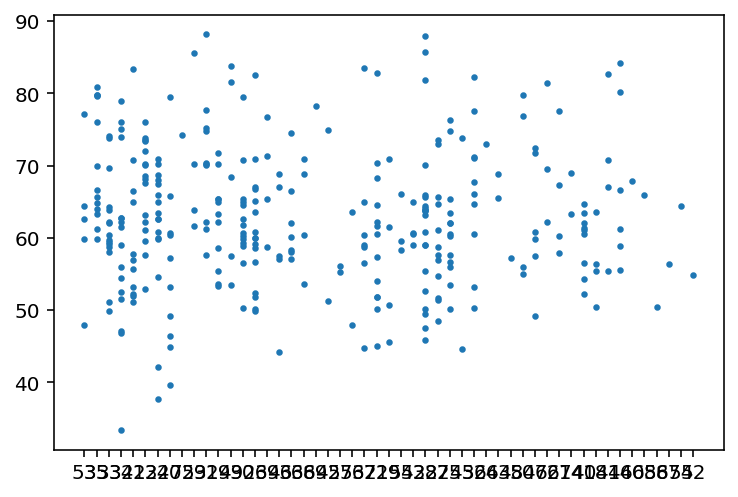

In [186]:
plt.scatter(bII_gfpage['Age'],bII_gfpage['GFP'],s=5)

In [187]:
age_sII = age_sII[age_sII['Age']!=4]

In [188]:
age_sII['Age'] = age_sII['Age'].astype(float)

In [189]:
ssp.pearsonr(age_sII['Age'],age_sII['OPG'])

(0.1019427652774085, 0.06395426031367178)

In [190]:
ssp.pearsonr(age_sII['Age'],age_sII['GFP'])

(0.1482204478199854, 0.006905445402351285)

In [191]:
bfasII_ages = age_sII.copy(deep=True)
cohort1 =bfasII_ages[(bfasII_ages['Age']>=18) & (bfasII_ages['Age']<=25)]
cohort2 = bfasII_ages[(bfasII_ages['Age']>=26) & (bfasII_ages['Age']<=33)]
cohort3 = bfasII_ages[(bfasII_ages['Age']>=34) & (bfasII_ages['Age']<=41)]
cohort4 = bfasII_ages[(bfasII_ages['Age']>=42)]

In [192]:
for cc in [cohort1,cohort2,cohort3,cohort4]:
    print(len(cc))
    print(cc['Age'].min())
    print(cc['Age'].max())
    print(ssp.stats.pearsonr(cc['GFP'],cc['OPG']))
    print("\n")

87
18.0
25.0
(0.6779043684005353, 5.508809452984147e-13)


109
26.0
33.0
(0.7094181305238632, 5.939256652880206e-18)


64
34.0
41.0
(0.6382722266027929, 1.3976960413955851e-08)


71
42.0
74.0
(0.7550718110474364, 2.8084464217011072e-14)




### Trait Intercorrelations

In [196]:
len(FACTORS) #FACTORS is a list of the 5 groups of items, from study I

5

In [197]:
factors_ = pd.DataFrame([x.mean(axis=1) for x in FACTORS]).T
factors_.columns = factorlabels

In [198]:
factors_.corr()

,NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS
NEUROTICISM,1.000000,0.252922,0.475746,0.528234,0.351890
AGREEABLENESS,0.252922,1.000000,0.372426,0.265502,0.414469
CONSCIENTIOUSNESS,0.475746,0.372426,1.000000,0.459681,0.364067
EXTRAVERSION,0.528234,0.265502,0.459681,1.000000,0.487340
OPENNESS,0.351890,0.414469,0.364067,0.487340,1.000000


In [199]:
(0.252922+0.475746+0.528234+0.351890+0.372426+0.265502+0.414469+0.459681+0.364067+0.487340)/10

0.3972277

In [200]:
bfasI_

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [201]:
factors_['opg'] = MeanOPGI_BFAS.values

In [202]:
factors_.corr()

,NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS,opg
NEUROTICISM,1.000000,0.252922,0.475746,0.528234,0.351890,0.516937
AGREEABLENESS,0.252922,1.000000,0.372426,0.265502,0.414469,0.597621
CONSCIENTIOUSNESS,0.475746,0.372426,1.000000,0.459681,0.364067,0.521174
EXTRAVERSION,0.528234,0.265502,0.459681,1.000000,0.487340,0.470024
OPENNESS,0.351890,0.414469,0.364067,0.487340,1.000000,0.567547
opg,0.516937,0.597621,0.521174,0.470024,0.567547,1.000000


In [203]:
def get_corrs_p_values(df):
    colz = df.columns.values.tolist()
    for col in colz:
        for col2 in colz:
            print(col)
            print(col2)
            print(ssp.pearsonr(df[col],df[col2]))
            print("\n")
        print("========")
        
        print("\n")

In [204]:
get_corrs_p_values(factors_)

NEUROTICISM
NEUROTICISM
(1.0, 0.0)


NEUROTICISM
AGREEABLENESS
(0.2529224842321425, 2.163930284931412e-06)


NEUROTICISM
CONSCIENTIOUSNESS
(0.4757455920221277, 1.0194785526151344e-20)


NEUROTICISM
EXTRAVERSION
(0.5282335004145746, 5.69759964579004e-26)


NEUROTICISM
OPENNESS
(0.3518899863795721, 2.0951919729711713e-11)


NEUROTICISM
opg
(0.5169368544753616, 9.208049378838768e-25)




AGREEABLENESS
NEUROTICISM
(0.2529224842321425, 2.163930284931412e-06)


AGREEABLENESS
AGREEABLENESS
(1.0, 0.0)


AGREEABLENESS
CONSCIENTIOUSNESS
(0.37242575385420534, 1.0800870125876187e-12)


AGREEABLENESS
EXTRAVERSION
(0.2655023323615226, 6.302377920349845e-07)


AGREEABLENESS
OPENNESS
(0.41446892870746443, 1.2497945304021736e-15)


AGREEABLENESS
opg
(0.5976211150626038, 1.7207764728639116e-34)




CONSCIENTIOUSNESS
NEUROTICISM
(0.4757455920221277, 1.0194785526151344e-20)


CONSCIENTIOUSNESS
AGREEABLENESS
(0.37242575385420534, 1.0800870125876187e-12)


CONSCIENTIOUSNESS
CONSCIENTIOUSNESS
(0.999999999999

In [205]:
factors_.corr().to_csv("BFASI_INTERCORRELATIONS_2021.csv")

In [206]:
# now for study II

In [207]:
factors_II = pd.DataFrame([x.mean(axis=1) for x in FACTORS_II]).T

In [208]:
factors_II.columns = factorlabels_II

In [209]:
factors_II.corr()

,NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS
NEUROTICISM,1.000000,0.304194,0.372566,0.406115,0.155428
AGREEABLENESS,0.304194,1.000000,0.235701,0.183079,0.391703
CONSCIENTIOUSNESS,0.372566,0.235701,1.000000,0.348937,0.175255
EXTRAVERSION,0.406115,0.183079,0.348937,1.000000,0.391420
OPENNESS,0.155428,0.391703,0.175255,0.391420,1.000000


In [210]:
factors_II.corr().to_csv("BFASII_INTERCORRELATIONS_2021.csv")

In [211]:
get_corrs_p_values(factors_II)

NEUROTICISM
NEUROTICISM
(1.0, 0.0)


NEUROTICISM
AGREEABLENESS
(0.3041941098732179, 1.625236441556239e-08)


NEUROTICISM
CONSCIENTIOUSNESS
(0.37256595345266125, 2.4444483956867156e-12)


NEUROTICISM
EXTRAVERSION
(0.40611524889366435, 1.4171096307764986e-14)


NEUROTICISM
OPENNESS
(0.1554277497173777, 0.004592521659170754)




AGREEABLENESS
NEUROTICISM
(0.3041941098732179, 1.625236441556239e-08)


AGREEABLENESS
AGREEABLENESS
(1.0, 0.0)


AGREEABLENESS
CONSCIENTIOUSNESS
(0.23570086850580116, 1.4696933131825774e-05)


AGREEABLENESS
EXTRAVERSION
(0.18307939449459837, 0.0008181920195292762)


AGREEABLENESS
OPENNESS
(0.39170268618996223, 1.3917226619230628e-13)




CONSCIENTIOUSNESS
NEUROTICISM
(0.37256595345266125, 2.4444483956867156e-12)


CONSCIENTIOUSNESS
AGREEABLENESS
(0.23570086850580116, 1.4696933131825774e-05)


CONSCIENTIOUSNESS
CONSCIENTIOUSNESS
(0.9999999999999997, 0.0)


CONSCIENTIOUSNESS
EXTRAVERSION
(0.3489367124726901, 6.544816308159006e-11)


CONSCIENTIOUSNESS
OPENNESS
(0.175

In [212]:
### Correlations with the GFP Loadings per item

In [213]:
#STUDY I

In [214]:
bfasomegaI = pd.read_csv("~/Dropbox/Delphy Research Dropbox/Delphy Tech/research/Openness-to-Personal-Growth/Code for Data Analysis _ Scripts/2021_BFASI_OMEGA5.csv")
#Manually sorted so that the rows are in the right order.

In [215]:
bfasomegaI.columns = ['Label','g','F1','F2','F3','F4','F5','h2','u2','p2']

In [216]:
bfasomegaI.head()

,Label,g,F1,F2,F3,F4,F5,h2,u2,p2
0,BFAS.1.,0.457046,0.644521,0.117963,-0.150582,0.058264,-0.045611,0.653891,0.346109,0.319458
1,BFAS.2.,0.498610,0.693516,-0.016543,-0.027188,0.076593,-0.038994,0.729946,0.270054,0.340590
2,BFAS.3.,0.466156,0.569033,0.010456,-0.033400,0.030950,0.087208,0.544214,0.455786,0.399294
3,BFAS.4.,0.484136,0.594994,0.030740,0.002338,-0.048150,0.077915,0.599100,0.400900,0.391233
4,BFAS.5.,0.468586,0.708397,0.076938,-0.127831,0.017355,-0.074624,0.740715,0.259285,0.296434


In [217]:
bfasI_.loc[:,'opg'] = MeanOPGI_BFAS.values

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [219]:
len(bfasomegaI['g'])

100

In [220]:
bfasI_.corr()['opg']

BFAS-1+      0.406869
BFAS-2+      0.465838
BFAS-3+      0.400870
BFAS-4+      0.402372
BFAS-5+      0.423769
               ...   
BFAS-98-     0.237751
BFAS-99-     0.100786
BFAS-100-    0.053939
BFAS-101-    0.362778
opg          1.000000
Name: opg, Length: 101, dtype: float64

In [218]:
ssp.pearsonr(bfasI_.corr()['opg'].iloc[0:-1],bfasomegaI['g'])

(0.759844218007687, 4.940453336152182e-20)

In [221]:
#STUDY II

In [222]:
bfasomegaII = pd.read_csv("~/Dropbox/Delphy Research Dropbox/Delphy Tech/research/Openness-to-Personal-Growth/Code for Data Analysis _ Scripts/2021_BFASII_OMEGA5.csv")
#Manually sorted so that the rows are in the right order.

In [223]:
bfasomegaII.columns = ['Label','g','F1','F2','F3','F4','F5','h2','u2','p2']

In [224]:
bfasomegaII.head()

,Label,g,F1,F2,F3,F4,F5,h2,u2,p2
0,BFAS.1.,0.365739,0.612254,0.209996,-0.247300,-0.029614,0.052693,0.625738,0.374262,0.213772
1,BFAS.2.,0.372881,0.732088,-0.005350,-0.073617,-0.072669,0.065209,0.684443,0.315557,0.203144
2,BFAS.3.,0.400235,0.678663,0.054665,-0.103391,0.085660,-0.021972,0.645056,0.354944,0.248333
3,BFAS.4.,0.402374,0.704604,0.015047,-0.071337,0.060596,-0.002093,0.667725,0.332275,0.242472
4,BFAS.5.,0.397479,0.657610,0.149556,-0.115109,-0.024714,0.031353,0.631098,0.368902,0.250341


In [225]:
bfasII_.loc[:,'opg'] = MeanOPGII_BFAS.values

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [226]:
ssp.pearsonr(bfasII_.corr()['opg'].iloc[0:-1],bfasomegaII['g'])

(0.6168129831352643, 8.312147867055455e-12)

In [229]:
## MISC

(array([ 3.,  0.,  1.,  7.,  4., 20., 26., 18., 28., 44., 29., 25., 25.,
        34., 33., 22., 16.,  3.,  2.,  2.]),
 array([36.91722222, 39.88790972, 42.85859722, 45.82928472, 48.79997222,
        51.77065972, 54.74134722, 57.71203472, 60.68272222, 63.65340972,
        66.62409722, 69.59478472, 72.56547222, 75.53615972, 78.50684722,
        81.47753472, 84.44822222, 87.41890972, 90.38959722, 93.36028472,
        96.33097222]),
 <BarContainer object of 20 artists>)

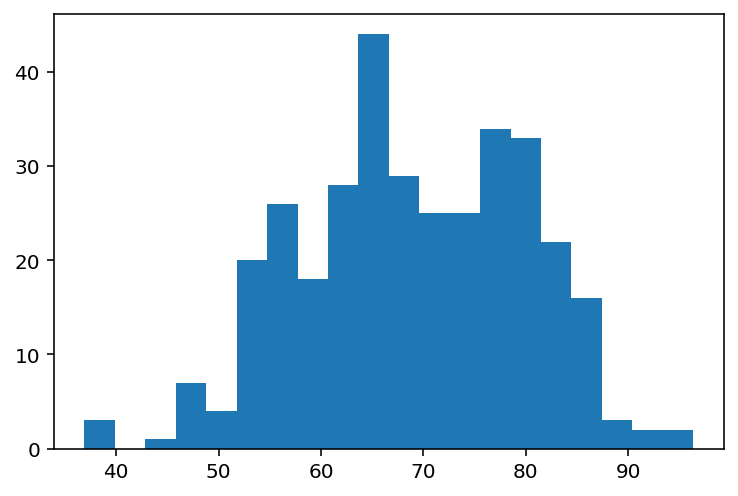

In [230]:
plt.hist(MeanOPGI_BFAS.values,bins=20)

In [243]:
factors_.loc[:,'gfp'] = factors_[["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]].mean(axis=1)

In [244]:
factors_.describe()

,NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS,opg,gfp
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,57.570865,67.727187,63.232877,55.562637,67.573607,69.012398,62.333435
std,18.316867,13.784175,14.012525,15.830253,12.808792,10.906997,10.804180
min,11.986000,5.927500,27.633500,3.594000,18.020000,36.917222,32.128600
25%,43.777000,58.384625,52.809250,45.195625,58.387375,61.012674,54.935225
50%,56.571750,67.403750,62.653000,56.178250,67.097250,68.422986,60.457500
75%,71.245500,78.177250,73.558875,65.274750,76.975125,77.826146,69.232900
max,99.961000,97.774000,95.719500,96.524000,96.947500,96.330972,94.628900


In [245]:
factors_II.loc[:,'gfp'] = factors_II[["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]].mean(axis=1)

In [246]:
factors_II.describe()

,NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS,gfp
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,57.959384,69.736609,62.379400,55.832243,68.344831,62.850493
std,17.281358,13.285818,14.262605,14.593162,11.952847,9.493331
min,5.973000,25.767000,17.322500,7.266000,25.501000,33.420200
25%,46.846000,61.103250,51.991750,47.445750,60.047750,57.010650
50%,58.870000,70.132500,63.682000,57.199500,68.410500,62.115400
75%,70.152750,79.727250,71.866750,64.464250,75.874750,68.739100
max,96.698500,99.164500,95.377000,87.518000,98.278500,88.145700


(0.0, 100.0)

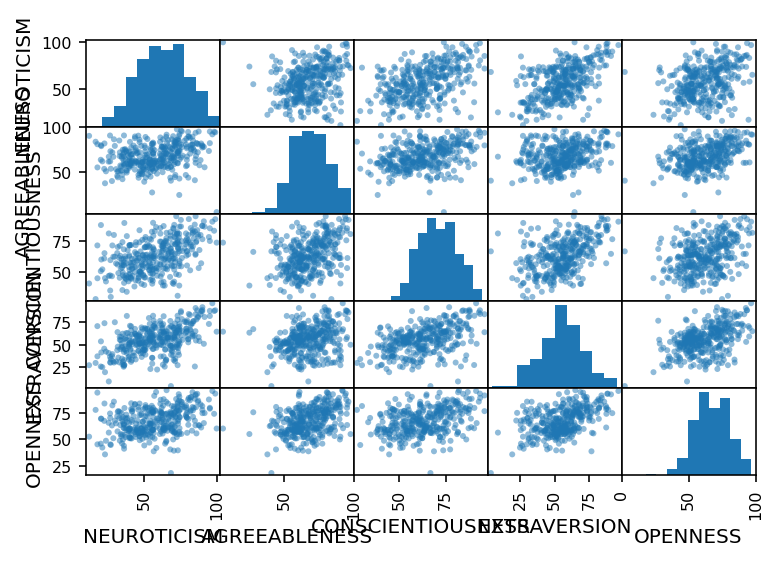

In [247]:
fig = pd.plotting.scatter_matrix(
    factors_[["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]],
        )
fig[0,0].set_xlim(0,100)
fig[1,1].set_xlim(0,100)
fig[2,2].set_xlim(0,100)
fig[3,3].set_xlim(0,100)
fig[4,4].set_xlim(0,100)


(0.0, 100.0)

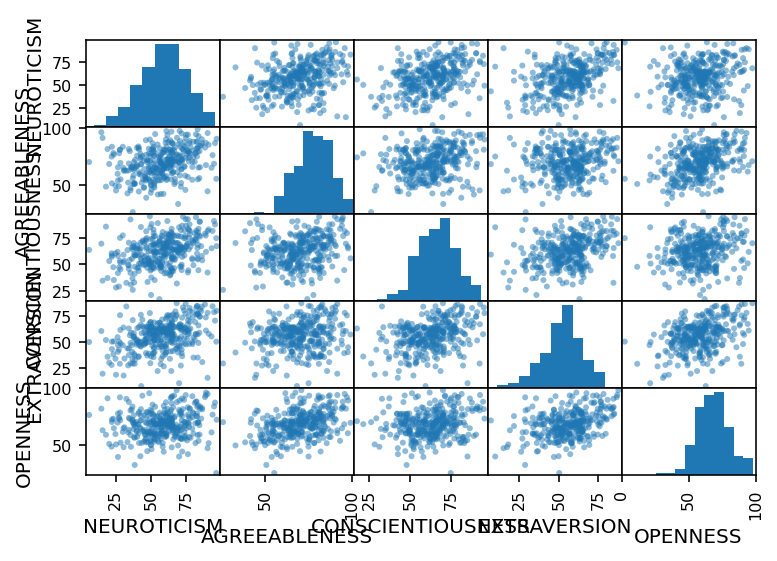

In [248]:
fig = pd.plotting.scatter_matrix(
    factors_II[["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]],
        )
fig[0,0].set_xlim(0,100)
fig[1,1].set_xlim(0,100)
fig[2,2].set_xlim(0,100)
fig[3,3].set_xlim(0,100)
fig[4,4].set_xlim(0,100)
